In [1]:
import pandas as pd

# Load the dataset
file_path = 'ifood_df.csv'
df = pd.read_csv(file_path)

# Display basic information and first few rows of the dataset
df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

(None,
     Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  MntMeatProducts  \
 0  58138.0        0         0       58       635         88              546   
 1  46344.0        1         1       38        11          1                6   
 2  71613.0        0         0       26       426         49              127   
 3  26646.0        1         0       26        11          4               20   
 4  58293.0        1         0       94       173         43              118   
 
    MntFishProducts  MntSweetProducts  MntGoldProds  ...  marital_Together  \
 0              172                88            88  ...                 0   
 1                2                 1             6  ...                 0   
 2              111                21            42  ...                 1   
 3               10                 3             5  ...                 1   
 4               46                27            15  ...                 0   
 
    marital_Widow  education_2n Cyc

In [2]:
# Descriptive Statistics: Key metrics

# Average total purchase
avg_total_purchase = df['MntTotal'].mean()

# Average frequency of purchases (sum of all purchase types)
purchase_columns = [
    'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases'
]
df['PurchaseFrequency'] = df[purchase_columns].sum(axis=1)
avg_purchase_frequency = df['PurchaseFrequency'].mean()

# Average web visits
avg_web_visits = df['NumWebVisitsMonth'].mean()

# Average Recency (days since last purchase)
avg_recency = df['Recency'].mean()

{
    "Average Total Purchase Value": avg_total_purchase,
    "Average Purchase Frequency": avg_purchase_frequency,
    "Average Web Visits per Month": avg_web_visits,
    "Average Recency (days since last purchase)": avg_recency
}


{'Average Total Purchase Value': 562.7646258503402,
 'Average Purchase Frequency': 14.88798185941043,
 'Average Web Visits per Month': 5.3369614512471655,
 'Average Recency (days since last purchase)': 49.00907029478458}

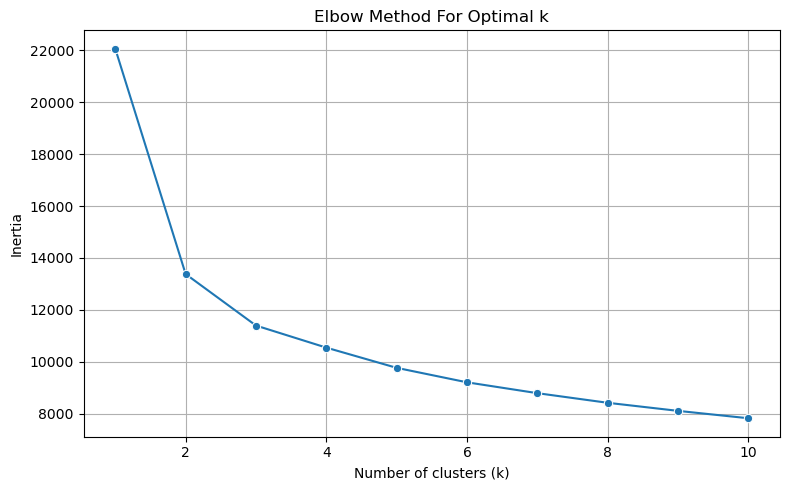

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Selecting behavioral features for clustering
features = [
    'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
    'MntSweetProducts', 'MntGoldProds', 'PurchaseFrequency',
    'NumWebVisitsMonth', 'Recency', 'Income'
]
X = df[features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Elbow method to find the optimal number of clusters
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plotting the elbow curve
plt.figure(figsize=(8, 5))
sns.lineplot(x=k_range, y=inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.tight_layout()
plt.show()


The Elbow Method plot shows a clear bend at k = 3 or 4, indicating that 3–4 clusters is a good choice for segmenting customers.

In [4]:
from sklearn.preprocessing import StandardScaler

# Select key features(columns representing behavior)

features = [
    'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
    'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
    'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
    'NumWebVisitsMonth', 'Recency', 'Income'
]

X = df[features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [5]:
from sklearn.cluster import KMeans

# Cluster the customers into 4 groups
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)


In [6]:
from sklearn.decomposition import PCA

# Reduce to 2 principal components for visualization
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_scaled)

# Add these to your dataframe
df['PC1'] = pca_components[:, 0]
df['PC2'] = pca_components[:, 1]


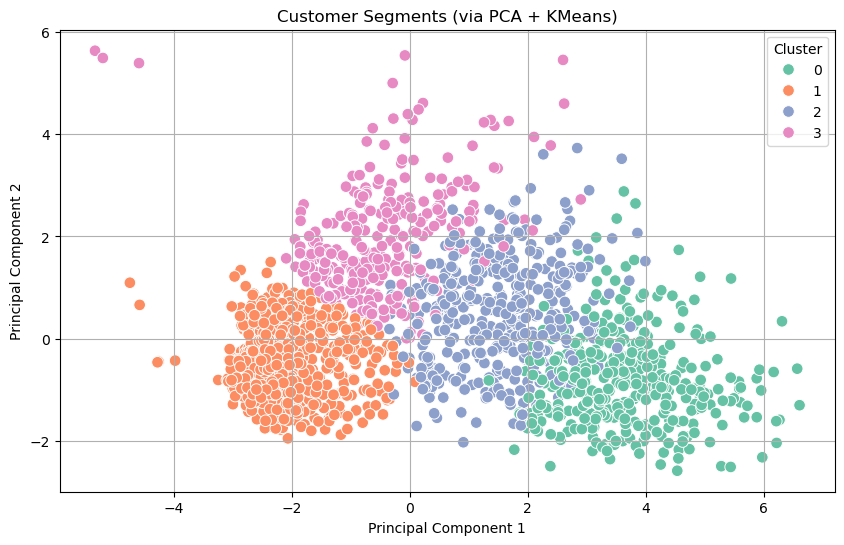

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='PC1', y='PC2', hue='Cluster', palette='Set2', s=70)
plt.title('Customer Segments (via PCA + KMeans)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.legend(title='Cluster')
plt.show()


In [8]:
# Re-import and reload data due to code execution reset
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Load the dataset again
file_path = 'ifood_df.csv'
df = pd.read_csv(file_path)

# Recreate necessary features
df['PurchaseFrequency'] = df[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(axis=1)

# Select features for clustering
features = [
    'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
    'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
    'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
    'NumWebVisitsMonth', 'Recency', 'Income'
]
X = df[features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reapply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Group by cluster and calculate means
cluster_summary = df.groupby('Cluster')[features].mean().round(1)
cluster_summary


,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Recency,Income
Cluster,,,,,,,,,,,,,
0,577.0,79.9,495.7,115.9,80.0,85.5,1.3,5.1,6.2,8.4,2.7,49.5,76495.4
1,38.5,4.8,20.9,7.0,5.0,14.5,1.9,2.0,0.5,3.2,6.4,49.0,34228.6
2,607.1,32.2,212.9,42.7,34.1,58.3,2.2,6.0,4.2,8.9,4.4,49.3,66830.5
3,330.5,12.4,95.3,19.8,13.9,58.0,5.2,6.4,2.2,6.0,7.1,47.9,49660.8


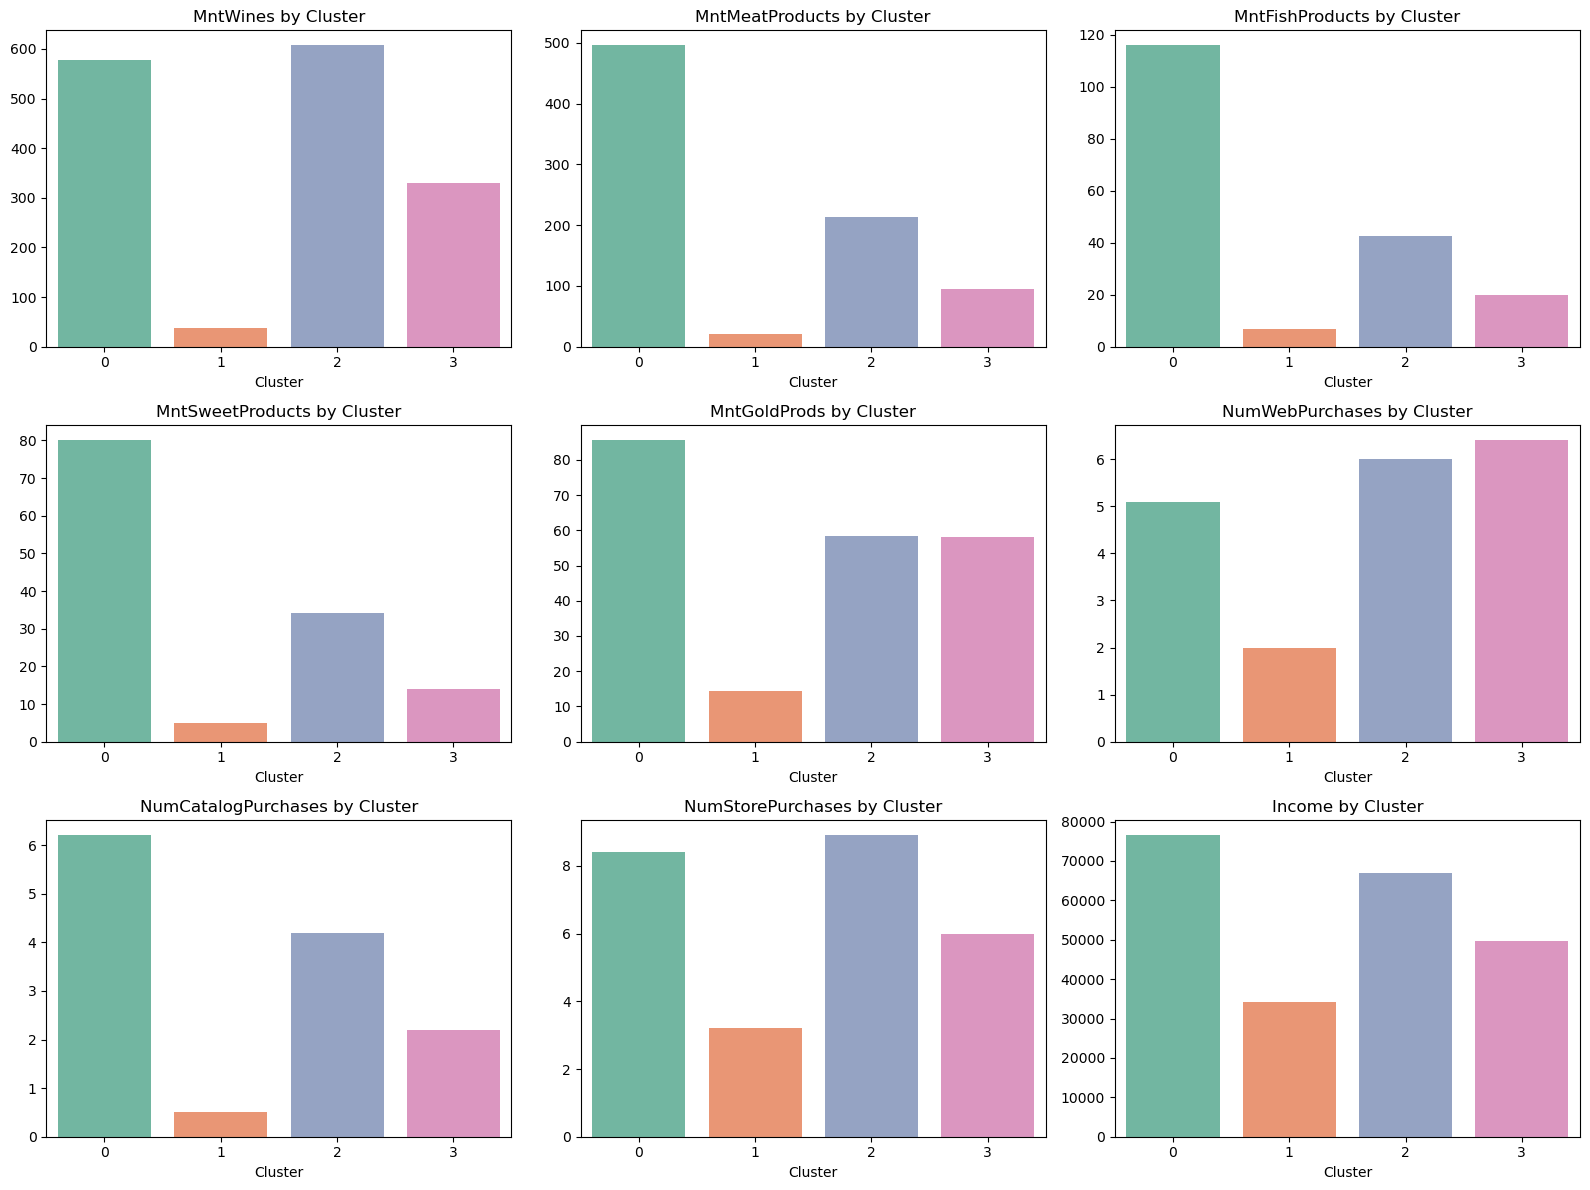

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bar chart for average spending and activity by cluster
bar_features = [
    'MntWines', 'MntMeatProducts', 'MntFishProducts',
    'MntSweetProducts', 'MntGoldProds', 'NumWebPurchases',
    'NumCatalogPurchases', 'NumStorePurchases', 'Income'
]

# Plotting
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 12))
axes = axes.flatten()

for i, feature in enumerate(bar_features):
    sns.barplot(
        data=cluster_summary.reset_index(), 
        x='Cluster', 
        y=feature, 
        hue='Cluster',             
        palette='Set2',
        legend=False,               
        ax=axes[i]
    )
    axes[i].set_title(f'{feature} by Cluster')
    axes[i].set_ylabel('')
    axes[i].set_xlabel('Cluster')

plt.tight_layout()
plt.show()


Cluster 0:
High spenders across all categories.
High use of all purchasing channels.

Cluster 1: 
Very low spend in all categories.
Least engaged in store or web activity.
Lowest income ($34,228.6).
Moderate recency, so not completely disengaged.

Recommendation:
Offer small discounts or bundles to encourage purchases.

Cluster 2:
High spenders.
Uses both online and store channels effectively.
Good mix of web, catalog, and store purchases.




Cluster 3: 
Low to medium spending on all products.
Prefers web purchases and has decent store purchases.
High number of deal-based purchases